In [1]:
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:

def compute_Matrix_D(Z):
    '''
    to compute matrix D, which is the intra-class distance
    '''
    Zij = Z.T @ Z
    diag = Zij.diagonal()
    Zii = np.tile(diag,(Zij.shape[0],1))
    Zjj = Zii.T

    return np.sqrt(Zii + Zjj - 2*Zij)

def compute_Matrix_B(D):
    '''
    to compute matrix B
    '''   
    Di = np.tile((D*D).sum(1),(D.shape[0],1))
    Dj = Di.T
    Dsum = (D*D).sum()
    n = D.shape[0]
    #print(Di.shape,Dj.shape,Dsum.shape)
    B = (Dj+Di - n*(D*D) - Dsum/n)/(2*n)
    # print(Di,Dj, Dsum)
    return B

def Eigen(mat,k):
    '''
    compute the eigenvalues and eigenvectors first, then find the first k large eigenvalues and corresponding vectors, 
    then return the dimensionality-reduced matrix.
    '''
    mat = mat.astype(np.float32)
    e_vals,e_vecs = np.linalg.eig(mat)
    sorted_indices = np.argsort(e_vals)
    e_vals,e_vecs = e_vals[sorted_indices[:-k-1:-1]],e_vecs[:,sorted_indices[:-k-1:-1]]
    e_vals = np.diag(e_vals)
    return (e_vecs @ np.sqrt(e_vals))

def read_dataset():
    '''
    load the data and select the pics whose labels are 1 and 2.
    ''' 
    data_transforms = transforms.Compose([transforms.ToTensor()])
    train_dataset = datasets.MNIST(root="./", transform=data_transforms,train=True,download=True)
    test_dataset = datasets.MNIST(root="./",transform=data_transforms,train=False)

    train_list_1 = []
    train_list_2 = []
    test_list_1 = []
    test_list_2 = []
    for sample in train_dataset:
        if sample[-1] == 1 :
            train_list_1.append(np.ravel(np.array(sample[0])))
        elif sample[-1] == 2 :
            train_list_2.append(np.ravel(np.array(sample[0])))
    for sample in test_dataset:
        if sample[-1] == 1 :
            test_list_1.append(np.ravel(np.array(sample[0])))
        elif sample[-1] == 2 :
            test_list_2.append(np.ravel(np.array(sample[0])))
    
    print('{} samples for training 1 and {} for testing 1'.format(len(train_list_1), len(test_list_1)))
    print('{} samples for training 2 and {} for testing 2'.format(len(train_list_2), len(test_list_2)))
    return train_list_1, train_list_2, test_list_1, test_list_2

In [3]:
def draw_figure(points_1, points_2, dim):
    '''
    visualizaion
    '''
    if dim == 2:
        plt.scatter(points_1[:, 0], points_1[:, 1], s=5, label='1')
        plt.scatter(points_2[:, 0], points_2[:, 1], s=5, label='2')
        plt.legend(loc='best')

    if dim == 3 :
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter(points_1[:, 0], points_1[:, 1], points_1[:, 2], s=5,  label='1')
        ax.scatter(points_2[:, 0], points_2[:, 1], points_2[:, 2], s=5, label='2')
        ax.legend(loc='best')
        
    plt.show()

In [4]:
def main():
    train_list_1, train_list_2, test_list_1, test_list_2 = read_dataset()
    train_matrix_1 = np.array(train_list_1[:3000]).T
    train_matrix_2 = np.array(train_list_2[:3000]).T
    '''
    train_D1 = compute_Matrix_D(train_matrix_1)
    train_D2 = compute_Matrix_D(train_matrix_2)
    train_B1 = compute_Matrix_B(train_D1)
    train_B2 = compute_Matrix_B(train_D2)


    train_1_DR_2 = Eigen(train_B1,2)
    train_2_DR_2 = Eigen(train_B2,2)
    draw_figure(train_1_DR_2, train_2_DR_2, 2)
    
    train_1_DR_3 = Eigen(train_B1,3)
    train_2_DR_3 = Eigen(train_B2,3)
    draw_figure(train_1_DR_3, train_2_DR_3, 3)
    '''
    train_matrix = np.concatenate((train_matrix_1, train_matrix_2), axis=1)
    train_D = compute_Matrix_D(train_matrix)
    train_B = compute_Matrix_B(train_D)
    
    train_DR_2 = Eigen(train_B,2)
    draw_figure(train_DR_2[:3000,:], train_DR_2[3000:,:], 2)
    
    train_DR_3 = Eigen(train_B,3)
    draw_figure(train_DR_3[:3000,:], train_DR_3[3000:,:], 3)
    
    np.save("train_DR_2.npy", train_DR_2)
    np.save("train_DR_3.npy", train_DR_3)


6742 samples for training 1 and 1135 for testing 1
5958 samples for training 2 and 1032 for testing 2


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


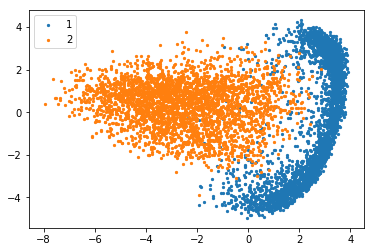

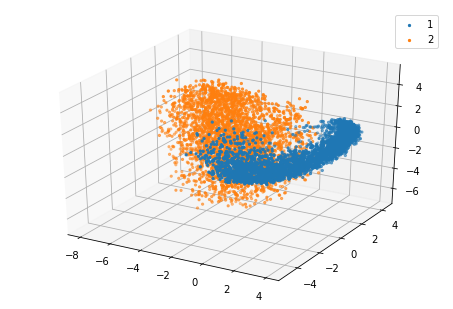

In [5]:
main()

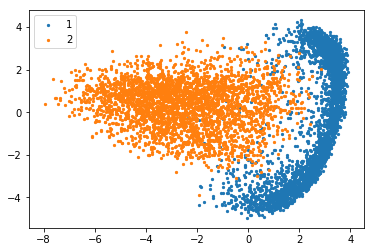

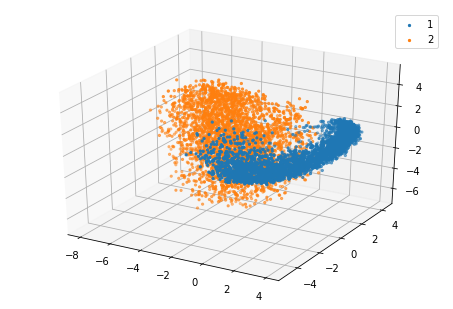

In [6]:
'''
to save time, TA can run the module directly to check the results.
'''
import os.path
if os.path.isfile('train_DR_2.npy'):
    train_DR_2 = np.load("train_DR_2.npy")
    train_DR_3 = np.load("train_DR_3.npy")
    draw_figure(train_DR_2[:3000,:], train_DR_2[3000:,:], 2)
    draw_figure(train_DR_3[:3000,:], train_DR_3[3000:,:], 3)